#  <div class="text-center">TP3 </div>

### 1) Import des données

In [1]:
#%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold


In [2]:
#Il s'agit du dictionnaire des coefficients de déterminations pour chacune des méthodes employées durant ce TP
scoresTP=dict()

In [3]:

df= pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv", ",", header=None)
df.head(5)



,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


Il y a 211 colonnes dans le dataset dont une de label, ce qui fait 210 variables explicatives avec 442 observations.

In [4]:
print(df.shape)

(442, 211)


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


In [6]:
meandf=pd.DataFrame(np.abs(df.mean()))
meandfnonzero=meandf.loc[meandf[0]>10**-10]
print(meandfnonzero)

              0
210  152.133484


In [7]:
stddf=pd.DataFrame(df.std())
stddfnon1=stddf.loc[np.abs(stddf[0]-1)>10**-2]
print(stddfnon1)

             0
210  77.093005


Les variables explicatives sont centrées et normalisées. La variable y à expliquer ne l'est pas, ni normalisée ni centrée.

In [8]:
Xdf = df.drop([210], 1)
ydf = df[210]

In [9]:
randomX= df.sample(4, axis=1)
randomX["y"]=ydf


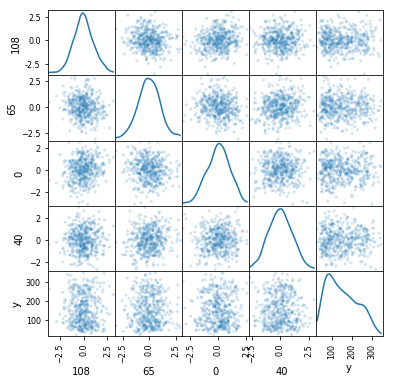

In [10]:
scatter_matrix(randomX, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

Les variables semblent avoir une distribution normale. Ce graph ne nous permet pas de voir une corrélation entre les variables.

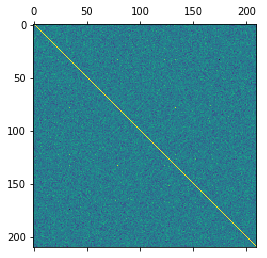

In [11]:
plt.matshow(Xdf.corr(),)
plt.show()

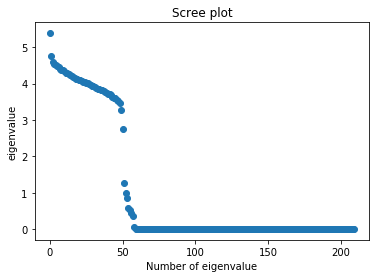

In [12]:
coveigenvalues, coveigenvectors= np.linalg.eigh(Xdf.cov())
eig_vals_sorted = np.sort(coveigenvalues)[::-1]
plt.scatter(np.arange(len(eig_vals_sorted)),eig_vals_sorted)
plt.xlabel("Number of eigenvalue")
plt.ylabel("eigenvalue")
plt.title("Scree plot")
plt.show()

Apres les 60 premières valeurs propres on a des valeurs propres négligeables, presque égale à 0.
Cela veut dire l'on peut exprimer très précisement les dernières composantes avec les 60 premières, principales. Le nouvel espace peut donc exprimer toutes l'information contenue dans l'espace des 210 variables.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(np.array(Xdf), np.array(ydf), test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 210)
(89, 210)
(353,)
(89,)


Ci dessus les dimensions de nos matrices de train et de test (X puis y)

In [82]:
U, S, V = np.linalg.svd(X_train) 
#Je reconstruis les valeurs propres de la matrice de de gram grâce aux valeurs singulières
eigvals = S**2 / np.cumsum(S)[-1]

Ici nul besoin d'ordonner les valeurs propres car les valeurs singulières (S) le sont déjà 

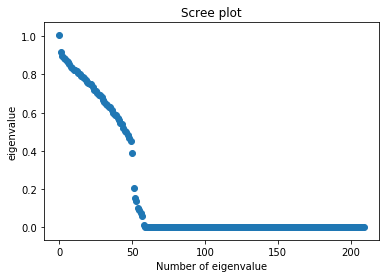

In [83]:

plt.figure()
plt.scatter(np.arange(len(eigvals)),eigvals)
plt.xlabel("Number of eigenvalue")
plt.ylabel("eigenvalue")
plt.title("Scree plot")
plt.show()


<div>Vérification<div>
On retrouve bien la même valeur 60 à partir de laquelle les valeurs propres sont négligeables

## 5) PCA before OLS
    Ici je vais utiliser la svd pour faire la PCA. 
    La PCA sert à réduire les dimensions de X (train) pour enlever l'information redondante et ne pas  travailler avec des matrices énormes et non inversibles (XtX^-1)

In [84]:
#Je prends d'abord les matrices complètes que je vais réduire moi même
U_train, S_train, V_train = np.linalg.svd(X_train)
eigvals = S_train**2 / np.cumsum(S_train)[-1]


Comme vu dans la question 3, on peut ne garder que les 60 premiers vecteurs et valeurs propres

In [85]:
#on réduit U S V
Ureduced = U_train[:,:60]
Sreduced = np.diag(S_train)[:60,:60]
Vreduced = V_train.T[:,:60]
Xreduced=Ureduced@Sreduced
#On projette XTrain sur le nouvel espace formé par les PCs de la PCA
Xpca = X_train@Vreduced
print(Xpca.shape)
print(np.sum(Xreduced-Xpca))

(353, 60)
1.5723808702555048e-13


J'ai réduit mon X_train qui comportait 210 colonnes à 60 colonnes. Ici on vérifie que XV=US

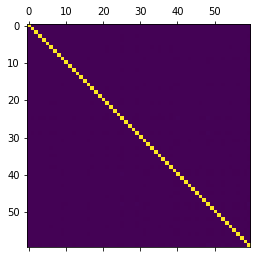

In [86]:
plt.matshow(pd.DataFrame(Xpca).corr())
plt.show()

Ici on vérifie que la matrice de corrélation n'indique plus de corrélation. En effet on a enlevé l'information redondante.

#### Maintenant on peut réaliser la regression linéaire avec notre nouvelle matrice Xpca issue de la PCA

In [87]:
#Ajout de l'intercept à Xpca
Xpca_I = sm.add_constant(Xpca)
gramPca=Xpca_I.T@Xpca_I
# Pour calculer Theta, on peut utiliser inv car il n'y a plus de corrélation maintenant
thetapca=np.linalg.inv(gramPca)@Xpca_I.T@y_train
#On projette Xtest sur l'espace PCA 
XtestPca= X_test@Vreduced
print(XtestPca.shape)
XtestPca= sm.add_constant(XtestPca)
ypredpca= XtestPca@thetapca

(89, 60)


On calcule le coefficient de détermination

In [88]:
R2pca=1-np.sum((ypredpca-y_test)**2)/np.sum((y_test-y_test.mean())**2)
scoresTP["PCA+OLS"]=R2pca
print(R2pca)

0.3715180458770734


On peut vérifier avec scikit learn le R2

In [89]:
# Choix de sklearn
regpca = LinearRegression()
regrpca = regpca.fit(Xpca_I, y_train)
print(regpca.score(XtestPca,y_test))

0.37151804587707327


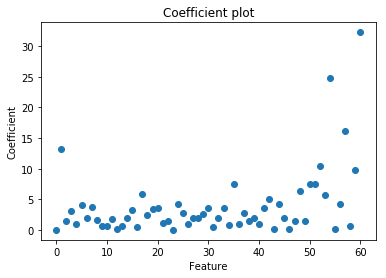

In [90]:

plt.figure()
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Coefficient plot")
plt.scatter(np.arange(0,regrpca.coef_.shape[0]),np.abs(regrpca.coef_))
plt.show()

On fait l'OLS maintenant sur X_train (sans pca) pour comparer

In [91]:
X_train_I = sm.add_constant(X_train)
X_test_I = sm.add_constant(X_test)

In [92]:
rangXtrain=np.linalg.matrix_rank(X_train)
print(rangXtrain)

60


La matrice n'est donc pas de rang plein, ie on ne peut pas l'inverser, car comme le montre la matrice de corrélation elle contient de l'information redondante

X_train non inversible on prend la pseudoinverse

Je vais utiliser ici deux méthodes pour m'assurer du résultat. La 1ere avec la fonction pinv de numpy, la deuxième avec la svd en reconstruisant la pseudoinverse comme vu dans le cours.  

In [93]:
thetaLR=np.linalg.pinv(X_train_I)@y_train
#thetaLR=np.linalg.inv(X_train_I.T@X_train_I)@X_train_I.T@y_train
ypredLR= X_test_I@thetaLR
Rlr=1-np.sum((ypredLR-y_test)**2)/np.sum((y_test-y_test.mean())**2)
scoresTP["OLS"]=Rlr
print(Rlr)

0.3715180458770737


Je fais la même chose mais avec la SVD.
Je refais une svd de X_train avec intercept pour exprimer la pseudoinverse
Je pouvais également réutiliser celle de PCA 

In [94]:
U_SVD, S_SVD, VT_SVD = np.linalg.svd(X_train_I, full_matrices=False) 

Pour perdre le moins d'informations possible je garde les valeurs propres > 0.0001

In [95]:
S_SVDR=S_SVD[np.where( S_SVD > 0.0001 )] 
#je reduis ensuite u et v
U_SVDR=U_SVD[:,:S_SVDR.size]
VT_SVDR=VT_SVD[:S_SVDR.size,:]
#je calcule theta et la prediction sur X_test
thetaLRSVD=VT_SVDR.T@np.linalg.inv(np.diag(S_SVDR))@U_SVDR.T@y_train
ypredLRSVD= X_test_I@thetaLRSVD
RlrSVD=1-np.sum((ypredLRSVD-y_test)**2)/np.sum((y_test-y_test.mean())**2)
print(RlrSVD)

0.3715180458770736


On a bien le même score pour OLS sans pca ( avec la svd ou directement la fonction pseudoinverse de np)

On trace également les coefficients obtenus

In [96]:
#on peut afficher les coefficients "non négligeables"
coefsplus2= np.where(np.abs(thetaLR[1:])>2)[0]
print(coefsplus2)

[ 34  58  79 123 133 135 167 174]


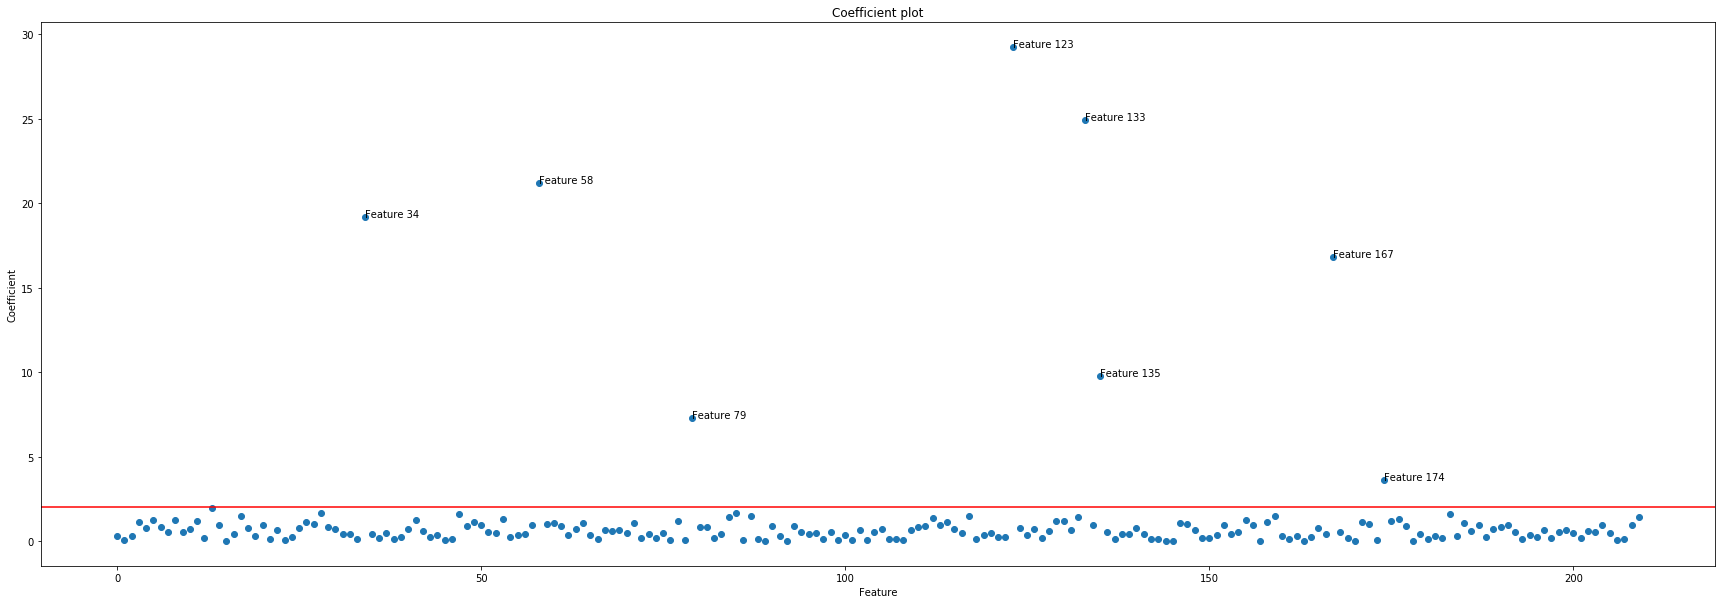

In [97]:
plt.figure(figsize=(30,10))
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Coefficient plot")
plt.scatter(np.arange(0,210),np.abs(thetaLR[1:]))
#plt.scatter(coefsplus2,np.abs(thetaLR[coefsplus2+1]), marker="o")
for coef in coefsplus2:
    plt.annotate("Feature "+str(coef),(coef,np.abs(thetaLR[coef+1])) )
plt.axhline(y=2, color="red")

plt.show()

Dans le doute, j'utilise également la fonction LinearRegression de Scikit learn, mais je trouve des résultats aberrants. Je ne connais pas comment fonctionne exactement cette fonction, mais la corrélation donc les valeurs propres qui explosent doivent jouer sur le résultat.

In [100]:
lrtrain= LinearRegression()
lrtrain.fit(X_train, y_train)
ypredlr= lrtrain.predict(X_test)
print(lrtrain.score(X_test, y_test))

-0.029510526783535607


## 6) Intercepts

On affiche les intercepts des coefficients obtenus par OLS et PCA + OLS

In [101]:
print(thetapca[0])
print(thetaLR[0])
print(y_train.mean())

150.11117747153384
150.11117747153384
151.94050991501416


On en conclut que les coefficient des OLS et PCA OLS sont sensiblement les mêmes et presque égaux à la moyenne de y_train. Cela est du au fait que les variables de X_train ne sont plus centrées ni normalisées car on a pris un échantillon de X. D'où le petit écart.

On standardise Xpca (centrage+ normalisation)

In [102]:
scaler = StandardScaler()
std = scaler.fit(Xpca)
XpcaStd = scaler.transform(Xpca)
thetapcaStd=np.linalg.inv(XpcaStd.T@XpcaStd)@XpcaStd.T@y_train
regpcaStd = LinearRegression()
regrpcaStd = regpcaStd.fit(XpcaStd, y_train)
print(regrpcaStd.intercept_)
print(y_train.mean())

151.94050991501416
151.94050991501416


Ici on vérifie bien que l'intercept est égal à la moyenne de y.

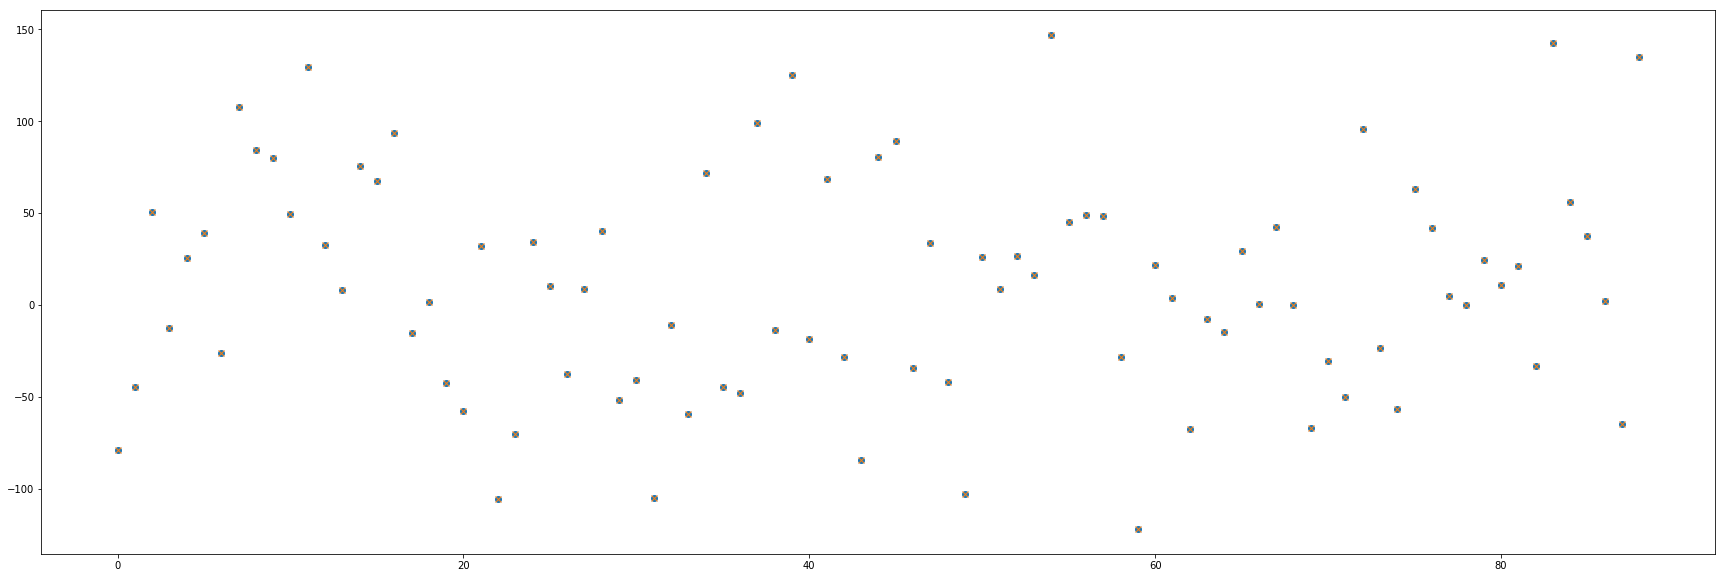

In [103]:
plt.figure(figsize=(30,10))
plt.plot(np.arange(0,y_test.shape[0]) ,y_test-ypredpca, "o")
plt.plot(np.arange(0,y_test.shape[0]) ,y_test-ypredLR, "x")
plt.show()

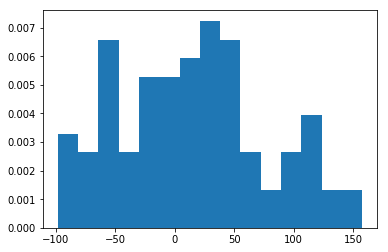

In [34]:
plt.figure()
plt.hist(y_test-ypredpca, bins=15, density=True)

plt.show()

ValueError: '20' is not a valid estimator for `bins`

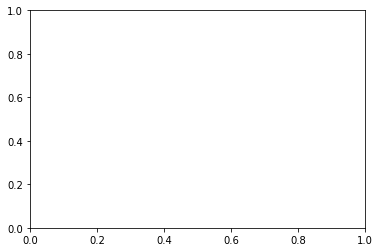

In [107]:
plt.figure()
plt.hist(y_test-ypredLR, bins="20")

plt.show()

In [36]:
print("R2 score avec OLS "+str(Rlr))
print("R2 score avec PCA +OLS "+str(R2pca))

R2 score avec OLS 0.41887057797419625
R2 score avec PCA +OLS 0.4188705779741969


Les coefficients de détermination respectivement de l'ols et PCA+OLS ci dessus sont à peu près les mêmes

## 8) Forward selection

On définit la fonction de forward selection avec un seuil en paramètre pour répondre à la question 9

In [37]:

def forward_selection(Xfwd, threshold=1):

    p=Xfwd.shape[1]
    n=Xfwd.shape[0]
    r= y_train
    test = np.zeros((p,p))
    pval_mem = np.zeros(p)
    pval = np.zeros((p,p))
    resids = y_train
    var_sel = []
    var_remain = list(range(p))
    in_test = []
    regr = LinearRegression(fit_intercept = False)
    
    for k in range(p): 
        resids_mem = np.zeros((p,n))
        #pour chaque variable explicative on fait une OLS en ajoutant l'intercept
        for i in var_remain:
            Xtemp=np.append(np.ones((Xfwd.shape[0],1)),Xfwd [:,[i]], axis=1)
            gramtemp=Xtemp.T@Xtemp
            graminvtemp= np.linalg.pinv(gramtemp)
            thetatemp=graminvtemp@Xtemp.T@resids
            ypredtemp=Xtemp@thetatemp
            resids_mem [i,:] =resids-ypredtemp
            
            #sigma2_tmp = np.sum (resids_mem [i,:] ** 2) * graminvtemp[1,1]
            sigma2_tmp= 1/(n-2)*np.linalg.norm(y_train-ypredtemp)**2
            stdtheta=np.sqrt(sigma2_tmp*graminvtemp[1,1])
            test[k,i] =  np.abs(thetatemp[1]) / stdtheta 
            #print(test[k,i])
            pval[k,i] =   2 * (1 - t.cdf(test[k,i],n-2))

        ####separe en deux vecteurs la listes des variables séléctionnées et les autres
        best_var = np.argmax(test[k,:])
        #print(pval[k,best_var])
        #print(threshold)
        var_sel.append(best_var)
        resids = resids_mem[best_var,:]
        if pval[k,best_var] > threshold:
            break
        pval_mem [k] = pval[k,best_var]
        var_remain = np.setdiff1d(var_remain,var_sel)
        
    return var_sel, test, pval_mem

On run la fonction ci dessus et on affiche les résultats dans un dataframe

In [38]:
#Definition des dataframe avec les colonnes correspondantes pour X_train et X_test
#X_trainfwd= np.append(np.ones((X_train.shape[0],1)), X_train, axis=1)
columns= np.append("intercept",range(0,210))
df_X_train=pd.DataFrame(X_train_I, columns=columns)

X_testfwd= np.append(np.ones((X_test.shape[0],1)), X_test, axis=1)
columns= np.append("intercept",range(0,210))
df_X_test=pd.DataFrame(X_test_I, columns=columns)

vfwd,tfwd,pfwd= forward_selection(X_train_I)
featureSelected= df_X_train.columns[vfwd]
display(pd.DataFrame(featureSelected))

,0
0,intercept
1,123
2,58
3,133
4,167
5,129
6,135
7,49
8,17
9,127


## 9) Forward selection avec un seuil de 0.1 sur la pvalue

Cette fois on run la fonction avec le paramètre de seuil 0.1

In [39]:
varfwd_selected,stats,pvalues = forward_selection(X_train_I, 0.1)
indexOfVarSelected= df_X_train.columns[varfwd_selected]

On plot les 3 premières itérations pour les variables sélectionnées

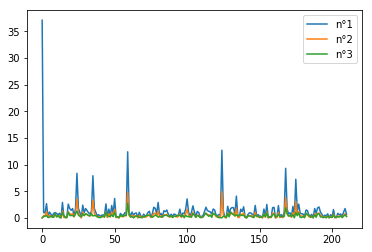

In [40]:
plt.plot(stats[0], label="n°1")
plt.plot(stats[1],label="n°2")
plt.plot(stats[2],label="n°3")
plt.legend()
plt.show()

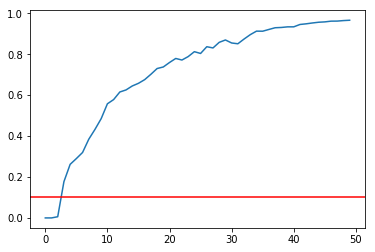

In [41]:
plt.plot(pfwd[0:50], label="n°1")
plt.axhline(y=0.1, color='r', linestyle='-')
plt.show()

In [42]:
pd.DataFrame(indexOfVarSelected).head(20)

,0
0,intercept
1,123
2,58
3,133


## 10) OLS sur les variables sélectionnées par forward selection

In [43]:
#On construit notre nouvel X avec les colonnes sélectionnées
Xfwd=df_X_train[ indexOfVarSelected]
pdXfwd= pd.DataFrame(Xfwd)
pdXfwd.head()

,intercept,123,58,133
0,1.0,0.373456,-0.832923,-0.177624
1,1.0,0.247742,-1.354097,0.574497
2,1.0,0.629361,1.614324,0.024870
3,1.0,0.279952,0.436020,-0.293335
4,1.0,-0.012809,-1.354097,0.256292


In [44]:
# Pareil pour Xtest
Xtestfwd=df_X_test[indexOfVarSelected]
Xtestfwd.head()

,intercept,123,58,133
0,1.0,-0.620783,-0.651646,0.400931
1,1.0,-0.108174,-0.425049,0.805919
2,1.0,-0.545618,-0.198452,0.024870
3,1.0,-0.473291,-0.696965,0.024870
4,1.0,1.776412,0.028145,2.657295


On fait notre prédiction sur ces nouveaux X_train et X_test

In [45]:
gram= Xfwd.T@Xfwd
B= np.linalg.inv(gram).dot(Xfwd.transpose().dot(y_train))
ypredFwd= Xtestfwd@B
prediction_error= np.sum((y_test-ypredFwd)**2)
R2fwd= 1-prediction_error/(np.sum((y_test-y_test.mean())**2))
print("R2 forward selection="+str(R2fwd))
print("predictionError="+str(prediction_error))

R2 forward selection=0.5013245749350138
predictionError=303978.47535200976


Vérification avec les packages

In [46]:
regSelected= LinearRegression()
regSelected.fit(Xfwd, y_train)

pd.DataFrame(Xtestfwd).head()
scoreSelected= regSelected.score(Xtestfwd, y_test)
scoresTP["Fwd"]=scoreSelected
print("R2 avec forward selection= "+str(scoreSelected))


R2 avec forward selection= 0.5013245749350134


## 11) Validation croisée Kfold

In [47]:
kf = KFold(n_splits=4, shuffle=True)
foldsTrain= []
foldsTest= []
for train_index, test_index in kf.split(X_train):
    foldsTrain.append(train_index)
    foldsTest.append(test_index)
    
    print("TRAIN:", train_index, "TEST:", test_index)






TRAIN: [  0   1   2   4   5   6   7   8  10  11  12  13  14  15  17  18  19  21
  22  23  24  27  28  29  31  32  33  34  35  36  37  38  42  43  44  45
  46  47  48  49  50  52  53  55  56  57  59  63  64  65  67  68  70  71
  74  75  76  80  81  83  84  86  87  89  90  91  92  93  94  95  96  98
  99 100 101 102 103 105 106 108 109 110 111 112 113 114 115 116 118 119
 120 121 122 123 124 125 126 127 128 133 134 135 136 138 139 140 142 143
 144 145 146 147 150 151 152 153 154 155 156 157 158 160 161 162 163 164
 165 166 167 169 170 171 172 173 174 176 177 180 182 183 184 185 186 188
 190 191 192 193 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 210 212 213 214 216 217 218 219 220 224 225 228 229 232 233 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 252 254 256 257 258 259
 260 261 263 264 265 266 268 269 270 271 272 273 275 277 278 279 280 282
 283 284 287 289 290 292 296 297 298 299 303 304 305 307 308 309 310 311
 312 313 314 315 316 319 320 322 323 324 325

In [48]:
pd.DataFrame(foldsTest).head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,3,9,16,20,25,26,30,39,40,41,...,318,321,327,328,329,335,337,339,345,351.0
1,1,6,7,8,12,13,15,17,18,22,...,314,315,331,340,342,344,346,347,349,NaN
2,2,4,5,10,14,21,24,33,34,35,...,320,322,324,330,333,338,343,348,352,NaN
3,0,11,19,27,29,36,45,63,67,68,...,316,323,325,326,332,334,336,341,350,NaN


## 12) Ridge

Définition de la fonction de cv pour lambda avec Ridge

In [49]:


def kFoldRidge(X, Y, lambdas):
    kf = KFold(n_splits=4, shuffle=True, random_state=2)
    r = dict()
    dfX= pd.DataFrame(X)
    dfY=pd.DataFrame(Y)
    for alpha in lambdas:
        ridgeReg =  Ridge(alpha=alpha)
        scores = []
        for train_index, test_index in kf.split(X):
        #     print("TRAIN:", train_index, "TEST:", test_index)
            X_traink, X_testk = dfX.take(train_index), dfX.take(test_index)
            Y_traink, Y_testk = dfY.take(train_index), dfY.take(test_index)
            ridgeReg.fit(X_traink, Y_traink)
            scores.append(ridgeReg.score(X_testk, Y_testk))
        r[alpha]= np.array(scores).mean()
        #print('alpha :'+ str(alpha) + "----> score mean :" + str(r[alpha]))
    return r

In [50]:
alphas=kFoldRidge(X_train,y_train, [10**(3-x) for x in range(15)])
print(alphas)

{1000: 0.27669690737023867, 100: 0.3858239451098826, 10: 0.37878956834362315, 1: 0.37532173090720644, 0.1: 0.3736764283412881, 0.01: 0.37331610414931454, 0.001: 0.37327627490802623, 0.0001: 0.3732722507453302, 1e-05: 0.37327184791316015, 1e-06: 0.3732718076257796, 1e-07: 0.3732718035970007, 1e-08: 0.3732718031941219, 1e-09: 0.3732718031538339, 1e-10: 0.37327180314980596, 1e-11: 0.3732718031494022}


In [51]:
bestAlpha= max(alphas, key=alphas.get)
print(bestAlpha)

100


In [52]:
alphas2=kFoldRidge(X_train,y_train,range(100))
bestAlpha= max(alphas2, key=alphas2.get)
print(bestAlpha)

66


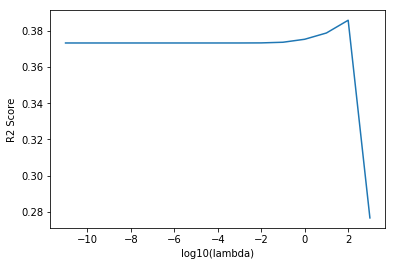

In [53]:
plt.plot(np.log10(list(alphas.keys())),alphas.values())
plt.xlabel("log10(lambda)")
plt.ylabel("R2 Score")
plt.show()

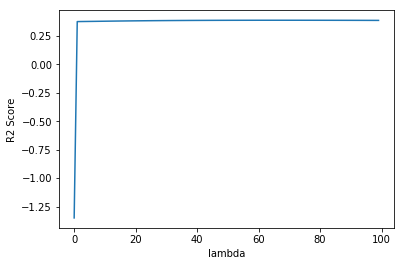

In [54]:
plt.plot(list(alphas2.keys()),alphas2.values())
plt.xlabel("lambda")
plt.ylabel("R2 Score")
plt.show()

In [55]:
rr =  Ridge(alpha=bestAlpha)
rr.fit(X_train, y_train)
R2rr=rr.score(X_test, y_test)
scoresTP["Ridge"]=R2rr
print("R2 score avec Ridge pour le best lambda "+str(R2rr))

R2 score avec Ridge pour le best lambda 0.41366259061744115


## 13) Lasso

On commence par chercher le bon paramètre alpha par cross validation

In [56]:
my_alphas = np.array([10**(3-x) for x in range(8)])
lassoCV = LassoCV(alphas=my_alphas,random_state=2,cv=5, max_iter=10**5)

lassoCV.fit(X_train,y_train)
print(lassoCV.alphas_)

[1.e+03 1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04]


On récupère les moyennes des MSE pour chacun des alphas 

In [57]:
avg_mse = np.mean(lassoCV.mse_path_,axis=1)
print(avg_mse)


[5647.69298315 5647.69298315 3296.26417403 3433.56587235 3650.13093683
 3685.05404203 3688.38641698 3688.7287653 ]


In [58]:
#print(lcv.score(X_test,y_test))

In [59]:
print(lassoCV.coef_)

[-0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.          0.         -0.
  0.          0.          0.         -0.          0.          0.33634949
 -0.          0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.          0.          0.
 -0.          0.          0.         -0.         -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.         20.0269512  -0.
 -0.          0.          0.          0.         -0.          0.
 -0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0. 

On trace les moyennes des MSE pour chaque alpha

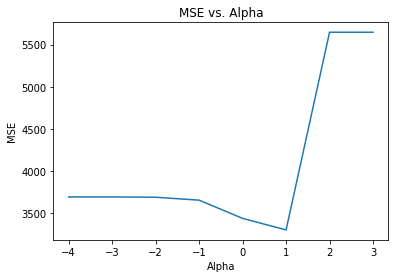

In [60]:

plt.plot(np.log10(lassoCV.alphas_),avg_mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()

On récupère le meilleur alpha

In [61]:
print(lassoCV.alphas_[avg_mse.argmin()])

10.0


Ou plus simplement

In [62]:
print(lassoCV.alpha_)

10.0


## 14) Least Square Lasso 

In [63]:
scoresTP["lasso"]=lassoCV.score(X_test,y_test)
print("Le R2 lasso "+str(scoresTP["lasso"]))

Le R2 lasso 0.4629487890602719


In [64]:
indexCoeffLassoSelected= np.nonzero(lassoCV.coef_)
print(lassoCV.coef_[indexCoeffLassoSelected])
print("Il y a "+str(len(indexCoeffLassoSelected[0]))+" coefficients non nuls")

[ 0.33634949 20.0269512  21.19235385  7.11477619 -0.109783  ]
Il y a 5 coefficients non nuls


On reconstruit notre XLasso avec uniquement les variables sélectionnées par le lasso:

In [65]:
X_train_lasso=pd.DataFrame(X_train)[ indexCoeffLassoSelected[0]]
X_test_lasso=pd.DataFrame(X_test)[ indexCoeffLassoSelected[0]]

In [66]:
X_train_lasso.head()

,23,58,123,167,174
0,-1.415982,-0.832923,0.373456,-0.843040,-1.376863
1,-1.154734,-1.354097,0.247742,0.242693,-0.293235
2,0.935254,1.614324,0.629361,0.532222,-1.144657
3,0.848171,0.436020,0.279952,0.459840,-0.138431
4,-1.067651,-1.354097,-0.012809,0.749369,3.809072


On applique l'OLS sur ce nouveau Xlasso

In [67]:
X_train_lasso_I= sm.add_constant(X_train_lasso)
X_test_lasso_I= sm.add_constant(X_test_lasso)


thetaLasso=np.linalg.inv(X_train_lasso_I.T@X_train_lasso_I)@X_train_lasso_I.T@y_train
#On projette Xtest sur l'espace PCA 
ypredLasso= X_test_lasso_I@thetaLasso


In [68]:
R2Lasso=1-np.sum((ypredLasso-y_test)**2)/np.sum((y_test-y_test.mean())**2)
scoresTP["lasso"]=R2Lasso
print("R2 pour Lasso "+str(R2Lasso))

R2 pour Lasso 0.5334177257190167


In [69]:
lrLasso= LinearRegression()
lrLasso.fit(X_train_lasso,y_train)
scoreLasso=lrLasso.score(X_test_lasso, y_test)
predLasso=lrLasso.predict(X_test_lasso)
print(scoreLasso)

0.5334177257190167


In [70]:
arra=np.append(predLasso.reshape(len(y_test),1),y_test.reshape(len(y_test),1), axis=1)
dfpredictlasso=pd.DataFrame(arra)
dfpredictlasso.head()

,0,1
0,111.885315,91.0
1,136.016131,111.0
2,147.369741,81.0
3,111.775418,214.0
4,196.177641,196.0


In [71]:
print(scoresTP)

{'PCA+OLS': 0.4188705779741969, 'OLS': 0.41887057797419625, 'Fwd': 0.5013245749350134, 'Ridge': 0.41366259061744115, 'lasso': 0.5334177257190167}


In [72]:
pd.DataFrame.from_dict(scoresTP, orient='index')

,0
PCA+OLS,0.418871
OLS,0.418871
Fwd,0.501325
Ridge,0.413663
lasso,0.533418


## 15) Ouverture

Ici nous allons essayer plusieurs modèles non linéaires avec des paramètres différents et comparer le R2

In [73]:
from sklearn import svm
#print(y_train)
clf = svm.SVR()
clf.fit(X_train_lasso, y_train)
R2SVM=clf.score(X_test_lasso,y_test)
print(R2SVM)

0.12822875893822305


In [74]:
from sklearn.linear_model import ElasticNet

regrEN = ElasticNet(random_state=0)
regrEN.fit(X_train, y_train)
R2EN=regrEN.score(X_train, y_train)
scoresTP["ElasticNet"]=R2EN

In [75]:
pd.DataFrame.from_dict(scoresTP, orient='index')

,0
PCA+OLS,0.418871
OLS,0.418871
Fwd,0.501325
Ridge,0.413663
lasso,0.533418
ElasticNet,0.543933


In [76]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='lbfgs', alpha=100, hidden_layer_sizes=(1, 10))
nn.fit(X_train_lasso, y_train)
nn.score(X_test_lasso,y_test)

0.5254011521686693

In [77]:
from sklearn.model_selection import GridSearchCV

mlp=MLPRegressor(solver='lbfgs')
param_grid = {
    'hidden_layer_sizes': [
     (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)],
    'alpha': [10**(5-x) for x in range(8)],
             }
GS = GridSearchCV(mlp, param_grid=param_grid, verbose=True)
GS.fit(X_train_lasso, y_train)
GS.best_estimator_

Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed:   15.5s finished


MLPRegressor(activation='relu', alpha=1000, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(19,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [78]:
R2MLP=GS.score(X_test_lasso,y_test)

In [79]:
scoresTP["MLP"]=R2MLP
print("R2 pour MLP "+str(R2MLP))

R2 pour MLP 0.5209137567492294


In [80]:
pd.DataFrame.from_dict(scoresTP, orient='index')

,0
PCA+OLS,0.418871
OLS,0.418871
Fwd,0.501325
Ridge,0.413663
lasso,0.533418
ElasticNet,0.543933
MLP,0.520914
